# Coding Task 2

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples

## Subtasks (maximum 12.5 points)


- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]

### Task 1
Images were uploaded to github and then converted in git.

In [2]:
#Modules used
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
# from skimage.external.tifffile import TiffFile
import skimage.filters as skf
import skimage.morphology as skm
from PIL import Image
import PIL
import os 

from heic2png import HEIC2PNG

In [6]:
img_folder_path = "image/"
img_folder = os.listdir(img_folder_path)

for file in os.listdir(img_folder_path):
    heic_img_path = os.path.join(img_folder_path, file)
    png_file_path = "image_png/" + file[:-4] + "png"
    
    try:
        # Convert HEIC to PNG
        heic_img = HEIC2PNG(heic_img_path)
        
        # Save the PNG file
        heic_img.save(png_file_path)
        print(f"Converted {file} to PNG successfully.")
    except Exception as e:
        # Log the error or handle it as needed
        print(f"Error converting {file}: {e}. Skipping...")

Error converting IMG_5379.HEIC: The file image_png\IMG_5379.png already exists.. Skipping...
Error converting IMG_5380.HEIC: The file image_png\IMG_5380.png already exists.. Skipping...
Error converting IMG_5381.HEIC: The file image_png\IMG_5381.png already exists.. Skipping...
Error converting IMG_5382.HEIC: The file image_png\IMG_5382.png already exists.. Skipping...
Error converting IMG_5383.HEIC: The file image_png\IMG_5383.png already exists.. Skipping...
Error converting IMG_5384.HEIC: The file image_png\IMG_5384.png already exists.. Skipping...
Error converting IMG_5385.HEIC: The file image_png\IMG_5385.png already exists.. Skipping...
Error converting IMG_5386.HEIC: The file image_png\IMG_5386.png already exists.. Skipping...
Error converting IMG_5387.HEIC: The file image_png\IMG_5387.png already exists.. Skipping...
Error converting IMG_5388.HEIC: The file image_png\IMG_5388.png already exists.. Skipping...
Error converting IMG_5389.HEIC: The file image_png\IMG_5389.png alread

### Task 2
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]

In [3]:
import cv2
import scipy

In [4]:
def image_input(path):
    imageRGB  = io.imread(path)
    image = imageRGB[:,:,2] #take gray color
    image = image[image.shape[0]//2:image.shape[0],:] #adjusting image
    return image

In [5]:
def create_binary(image, Lower = 70):
    wellplate_f = scipy.ndimage.gaussian_filter(image,sigma=10) #blur image 
    thresh = cv2.threshold(wellplate_f,Lower, 255, cv2.THRESH_BINARY_INV)[1]
    return thresh

Example usage:

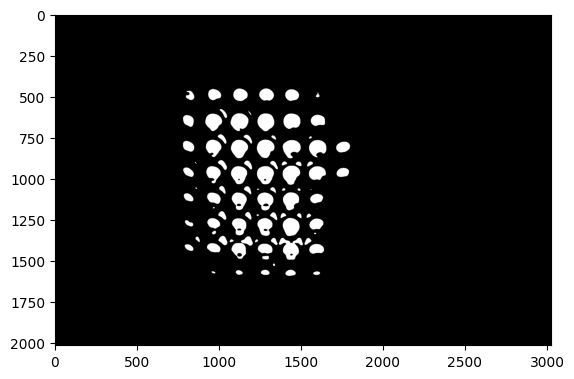

In [12]:
img = image_input("image_png/IMG_5379.png")
thresh = create_binary(img,60)

plt.imshow(thresh, cmap="gray")

### Task 3
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points]

In [7]:
def bin_counting(image, window = 200, step = 100, threshold_A = 20000):
    img = image
    # Define the sliding window parameters
    window_size = window  # Size of the sliding window
    step_size = step   # Step size for moving the window

    # Initialize the counter
    counter = 0

    # Define the region above which to count white pixels
    threshold = threshold_A  # Threshold

    # Iterate over the image with the sliding window
    for y in range(0, img.shape[0], step_size):
        for x in range(0, img.shape[1], step_size):
            # Extract the current window
            window = img[y:y+window_size, x:x+window_size]
            
            # Count the number of white pixels in the window
            white_pixels = np.sum(window == 255)
            # Update the counter if the window is above the specified region
            if white_pixels >= threshold:
                counter += 1

    # Output the result
    return counter

### Task 4
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

We take a look at the grayscale histogram to determine if we could implement "automated thresholding".

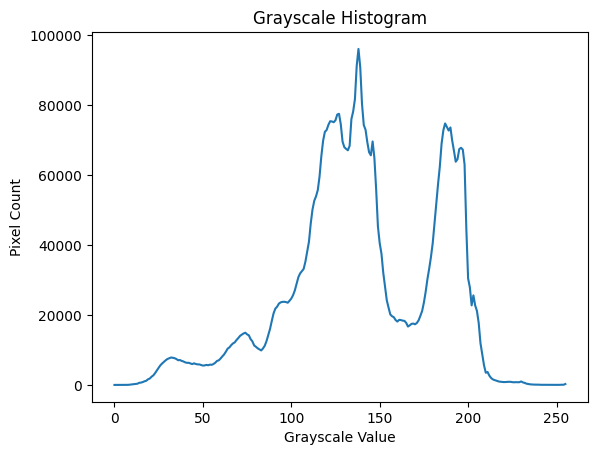

In [8]:
img = image_input(img_png_path+"/"+"IMG_5384.png")
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
_, max_val, _, _ = cv2.minMaxLoc(hist)
plt.plot(hist)
plt.title("Grayscale Histogram")
plt.xlabel("Grayscale Value")
plt.ylabel("Pixel Count")
plt.show()

By inspecting the histogram and playing with the threshold values, we can see that the cutoff between filled bins and unfilled bins is the local minima between 50 and 100. We want to write a code that takes the local minima between 50 and 100 and outputs a number as threshold value. 

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def find_min(img):# Beispiel: Ein Bild laden und Histogramm berechnen
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()[50:100]

    # Bin centers für das Histogramm
    bin_centers = np.arange(50,100)

    # Dynamische Berechnung der Fenstergröße basierend auf der Anzahl der Datenpunkte
    window_size = min(11, len(bin_centers) - (len(bin_centers) % 2) - 1)
    poly_order = 3

    # Savitzky-Golay-Filter anwenden, um die Daten zu glätten
    smooth_hist = savgol_filter(hist, window_size, poly_order)
    smooth_hist_der2 = savgol_filter(hist, window_size, poly_order, deriv=1)

    # Nullstellen der zweiten Ableitung (Wendepunkte) finden
    turning_points_indices = np.where(np.diff(np.sign(smooth_hist_der2)))[0]
    turning_points = bin_centers[turning_points_indices]
    turning_points_values = smooth_hist[turning_points_indices]

    # Wendepunkte und deren Werte ausgeben
    b = min(turning_points_values)
    c = turning_points[np.where(turning_points_values == b)]
    return c.astype(int)

Now we can use it to do automated thresholding according to the images.

In [10]:
from statistics import mean
img_png_path = "image_png"
for file in os.listdir(img_png_path):
    try:
        image = image_input(img_png_path+"/"+file)
        AA = find_min(image)[0]
        img_by = create_binary(image,AA)
        counter = bin_counting(img_by,window=270,step=130,threshold_A=15000)
    except Exception as e:
        print("An error occurred:", e)
        continue  # Skip to the next iteration
        
    print("Estimated bins for " + file +":" + str(counter))

Estimated bins for IMG_5379.png:71
Estimated bins for IMG_5380.png:81
Estimated bins for IMG_5381.png:147
Estimated bins for IMG_5382.png:147
Estimated bins for IMG_5383.png:22
Estimated bins for IMG_5384.png:10
Estimated bins for IMG_5385.png:10
Estimated bins for IMG_5386.png:11
Estimated bins for IMG_5387.png:64
Estimated bins for IMG_5388.png:13
Estimated bins for IMG_5389.png:86
Estimated bins for IMG_5390.png:17
Estimated bins for IMG_5391.png:7
Estimated bins for IMG_5392.png:80
Estimated bins for IMG_5393.png:18


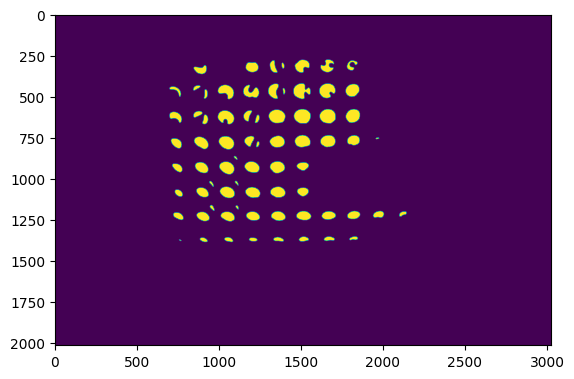

In [14]:
img_png_path = "image_png"
image = image_input(img_png_path+"/"+"IMG_5388.png")
AA = find_min(image)[0]
img_by = create_binary(image,AA)

plt.imshow(img_by)